In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data =  pd.read_csv("top50_sportify_songs.csv" , encoding='latin-1' , index_col=0)
data.head()

,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


In [3]:
data.tail()

,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
46,One Thing Right,Marshmello,brostep,88,62,66,-2,58,44,182,7,5,88
47,Te Robaré,Nicky Jam,latin,176,75,67,-4,8,80,202,24,6,88
48,Happier,Marshmello,brostep,100,79,69,-3,17,67,214,19,5,88
49,Call You Mine,The Chainsmokers,edm,104,70,59,-6,41,50,218,23,3,88
50,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,95,79,75,-6,7,61,206,21,12,82


In [4]:
data.shape

(50, 13)

In [5]:
data.describe()

,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
count,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,120.060000,64.060000,71.38000,-5.660000,14.660000,54.600000,200.960000,22.160000,12.480000,87.500000
std,30.898392,14.231913,11.92988,2.056448,11.118306,22.336024,39.143879,18.995553,11.161596,4.491489
min,85.000000,32.000000,29.00000,-11.000000,5.000000,10.000000,115.000000,1.000000,3.000000,70.000000
25%,96.000000,55.250000,67.00000,-6.750000,8.000000,38.250000,176.750000,8.250000,5.000000,86.000000
50%,104.500000,66.500000,73.50000,-6.000000,11.000000,55.500000,198.000000,15.000000,7.000000,88.000000
75%,137.500000,74.750000,79.75000,-4.000000,15.750000,69.500000,217.500000,33.750000,15.000000,90.750000
max,190.000000,88.000000,90.00000,-2.000000,58.000000,95.000000,309.000000,75.000000,46.000000,95.000000


# Display details of the songs that have popularity above 80

In [6]:
data[data.Popularity > 80].shape

(46, 13)

# Which is having maximum length, beats per minute?


In [7]:
data[data['Beats.Per.Minute'] == data['Beats.Per.Minute'].max()].shape

(1, 13)

# 	Which is having minimum length, beats per minute?


In [8]:
data[data['Beats.Per.Minute'] == data['Beats.Per.Minute'].min()].shape

(2, 13)

# # Create new column 'track_name_length' to store string length

In [9]:
data['Track.Name_length']= data['Track.Name'].str.len()
data['Track.Name_length'].head()

1     8
2     5
3    29
4    31
5    27
Name: Track.Name_length, dtype: int64

# # Create new column 'Artist_first_name' to store first name of each artist

In [10]:
data['Artist.first_name']= data['Artist.Name'].str.split(' ').str[0]
data['Artist.first_name'].head()

1     Shawn
2     Anuel
3    Ariana
4        Ed
5      Post
Name: Artist.first_name, dtype: object

# How many songs from “dance pop” genre?

In [11]:
data[data['Genre']=='dance pop'].shape


(8, 15)

# What is average length for each genre?

In [12]:
data['Genre'].value_counts()

dance pop           8
pop                 7
latin               5
edm                 3
canadian hip hop    3
dfw rap             2
reggaeton flow      2
canadian pop        2
electropop          2
panamanian pop      2
brostep             2
reggaeton           2
country rap         2
big room            1
trap music          1
pop house           1
boy band            1
r&b en espanol      1
escape room         1
australian pop      1
atl hip hop         1
Name: Genre, dtype: int64

In [13]:
#another way 

data.groupby(['Genre']).groups

{'atl hip hop': Int64Index([34], dtype='int64'),
 'australian pop': Int64Index([27], dtype='int64'),
 'big room': Int64Index([36], dtype='int64'),
 'boy band': Int64Index([39], dtype='int64'),
 'brostep': Int64Index([46, 48], dtype='int64'),
 'canadian hip hop': Int64Index([15, 19, 28], dtype='int64'),
 'canadian pop': Int64Index([1, 26], dtype='int64'),
 'country rap': Int64Index([9, 22], dtype='int64'),
 'dance pop': Int64Index([3, 12, 16, 32, 35, 40, 42, 43], dtype='int64'),
 'dfw rap': Int64Index([5, 18], dtype='int64'),
 'edm': Int64Index([31, 41, 49], dtype='int64'),
 'electropop': Int64Index([10, 25], dtype='int64'),
 'escape room': Int64Index([20], dtype='int64'),
 'latin': Int64Index([17, 24, 29, 30, 47], dtype='int64'),
 'panamanian pop': Int64Index([14, 37], dtype='int64'),
 'pop': Int64Index([4, 6, 8, 13, 38, 44, 50], dtype='int64'),
 'pop house': Int64Index([21], dtype='int64'),
 'r&b en espanol': Int64Index([45], dtype='int64'),
 'reggaeton': Int64Index([11, 33], dtype='i

# What is average length for each artist?

In [14]:
data['Artist.Name'].value_counts()

Ed Sheeran          4
Post Malone         2
Ariana Grande       2
Billie Eilish       2
J Balvin            2
Marshmello          2
The Chainsmokers    2
Shawn Mendes        2
Lil Nas X           2
Sech                2
Lunay               1
Drake               1
Sam Smith           1
Jhay Cortez         1
Young Thug          1
MEDUZA              1
Chris Brown         1
ROSALÍA             1
Taylor Swift        1
Lil Tecca           1
Jonas Brothers      1
Martin Garrix       1
DJ Snake            1
Tones and I         1
Nicky Jam           1
Bad Bunny           1
Lady Gaga           1
Y2K                 1
Lauv                1
Kygo                1
Daddy Yankee        1
Khalid              1
Lewis Capaldi       1
Lizzo               1
Maluma              1
Anuel AA            1
Ali Gatie           1
Katy Perry          1
Name: Artist.Name, dtype: int64

In [15]:
data.groupby(['Artist.Name']).groups

{'Ali Gatie': Int64Index([28], dtype='int64'),
 'Anuel AA': Int64Index([2], dtype='int64'),
 'Ariana Grande': Int64Index([3, 32], dtype='int64'),
 'Bad Bunny': Int64Index([11], dtype='int64'),
 'Billie Eilish': Int64Index([10, 25], dtype='int64'),
 'Chris Brown': Int64Index([16], dtype='int64'),
 'DJ Snake': Int64Index([12], dtype='int64'),
 'Daddy Yankee': Int64Index([29], dtype='int64'),
 'Drake': Int64Index([15], dtype='int64'),
 'Ed Sheeran': Int64Index([4, 6, 38, 50], dtype='int64'),
 'J Balvin': Int64Index([17, 30], dtype='int64'),
 'Jhay Cortez': Int64Index([23], dtype='int64'),
 'Jonas Brothers': Int64Index([39], dtype='int64'),
 'Katy Perry': Int64Index([35], dtype='int64'),
 'Khalid': Int64Index([44], dtype='int64'),
 'Kygo': Int64Index([41], dtype='int64'),
 'Lady Gaga': Int64Index([43], dtype='int64'),
 'Lauv': Int64Index([40], dtype='int64'),
 'Lewis Capaldi': Int64Index([13], dtype='int64'),
 'Lil Nas X': Int64Index([9, 22], dtype='int64'),
 'Lil Tecca': Int64Index([7], d

# What is maximum length for each genre?

In [16]:
data.groupby(['Genre'])['Length.'].max()

Genre
atl hip hop         200
australian pop      210
big room            164
boy band            181
brostep             214
canadian hip hop    213
canadian pop        191
country rap         157
dance pop           261
dfw rap             175
edm                 228
electropop          195
escape room         173
latin               266
panamanian pop      288
pop                 220
pop house           153
r&b en espanol      162
reggaeton           251
reggaeton flow      309
trap music          131
Name: Length., dtype: int64

# What is avg length for each genre and max of danceability

In [17]:
data.groupby(['Genre'])['Length.' , 'Danceability'].agg({'Danceability':max,'Length':'mean'})

C:\Users\Akriti gupta\anaconda\lib\site-packages\pandas\core\groupby\generic.py:1315: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


Danceability                   Length             
                      Length. Danceability     Length. Danceability
Genre                                                              
atl hip hop               200           80  200.000000    80.000000
australian pop            210           82  210.000000    82.000000
big room                  164           66  164.000000    66.000000
boy band                  181           84  181.000000    84.000000
brostep                   214           69  198.000000    67.500000
canadian hip hop          213           84  193.000000    80.000000
canadian pop              191           76  191.000000    72.500000
country rap               157           88  136.000000    79.000000
dance pop                 261           82  202.625000    70.250000
dfw rap                   175           76  166.500000    67.000000
edm                       228           69  218.666667    52.333333
electropop                195           70  194.500000    68.500000
escape room               173           72  173.000000    72.000000
latin                     266           80  225.200000    72.000000
panamanian pop            288           75  257.000000    74.000000
pop                       220           90  195.428571    68.428571
pop house                 153           68  153.000000    68.000000
r&b en espanol            162           88  162.000000    88.000000
reggaeton                 251           78  213.500000    69.500000
reggaeton flow            309           81  305.500000    80.000000
trap music                131           75  131.000000    75.000000

# What is average length for each artist?

In [18]:
data.groupby(['Artist.Name'])['Length.'].mean()

Artist.Name
Ali Gatie           213.0
Anuel AA            302.0
Ariana Grande       182.5
Bad Bunny           251.0
Billie Eilish       194.5
Chris Brown         261.0
DJ Snake            185.0
Daddy Yankee        193.0
Drake               205.0
Ed Sheeran          196.5
J Balvin            232.5
Jhay Cortez         309.0
Jonas Brothers      181.0
Katy Perry          224.0
Khalid              198.0
Kygo                228.0
Lady Gaga           216.0
Lauv                199.0
Lewis Capaldi       182.0
Lil Nas X           136.0
Lil Tecca           131.0
Lizzo               173.0
Lunay               266.0
MEDUZA              153.0
Maluma              176.0
Marshmello          198.0
Martin Garrix       164.0
Nicky Jam           202.0
Post Malone         166.5
ROSALÍA             162.0
Sam Smith           202.0
Sech                257.0
Shawn Mendes        191.0
Taylor Swift        171.0
The Chainsmokers    214.0
Tones and I         210.0
Y2K                 161.0
Young Thug          200.0


# How many songs share same popularity?

In [19]:
data.head()
data.groupby(['Popularity'])[['Track.Name']].count()

,Track.Name
Popularity,
70,1
78,1
79,1
80,1
82,2
83,2
84,3
85,1
86,2


# Rank each song based on popularity.

In [20]:
data['Popularity'].value_counts()
#data.groupby(['Popularity'])[['Track.Name']].transform(list).rank().head()

89    8
88    8
91    7
87    4
92    3
90    3
84    3
86    2
82    2
83    2
78    1
79    1
80    1
95    1
85    1
94    1
93    1
70    1
Name: Popularity, dtype: int64

In [21]:
data.groupby(['Popularity']).transform(list).rank().head()

,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Track.Name_length,Artist.first_name
1,34.0,43.5,10.5,30.0,13.0,31.5,20.0,13.0,40.5,20.5,7.0,4.0,12.5,43.5
2,7.0,2.0,48.5,26.0,46.0,37.0,40.0,13.0,28.5,49.0,13.0,29.5,2.0,2.0
3,49.0,3.5,17.5,50.0,45.0,2.0,40.0,38.5,38.0,19.0,19.5,50.0,40.0,3.5
4,4.0,13.5,40.0,8.0,24.0,9.5,6.0,13.0,25.0,25.5,19.5,39.0,42.0,13.5
5,12.0,37.5,22.5,40.0,24.0,6.0,40.0,25.5,3.5,12.0,43.0,24.5,38.0,37.5


In [22]:
data.groupby(['Popularity'])[['Track.Name']].transform(list).rank().head()

,Track.Name
1,34.0
2,7.0
3,49.0
4,4.0
5,12.0


In [23]:
data['Popularity'].rank(ascending=False).head()

1    48.0
2     5.0
3    39.0
4    37.5
5     2.0
Name: Popularity, dtype: float64

In [24]:
rank_data = data['Popularity'].rank()
rank_data

1      3.0
2     46.0
3     12.0
4     13.5
5     49.0
6     10.0
7     46.0
8     36.0
9     16.5
10    50.0
11    48.0
12    13.5
13    22.5
14    16.5
15    46.0
16     5.5
17    36.0
18    41.0
19    22.5
20    41.0
21    41.0
22    41.0
23     7.5
24    41.0
25    30.5
26     1.0
27     7.5
28    30.5
29    41.0
30    30.5
31    10.0
32    30.5
33    30.5
34    30.5
35    30.5
36    30.5
37    41.0
38    16.5
39     4.0
40     2.0
41    22.5
42    36.0
43    16.5
44    10.0
45    22.5
46    22.5
47    22.5
48    22.5
49    22.5
50     5.5
Name: Popularity, dtype: float64

# Average, Maximum, Minimum, standard deviation of each column

In [25]:
data.describe()

,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity,Track.Name_length
count,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,120.060000,64.060000,71.38000,-5.660000,14.660000,54.600000,200.960000,22.160000,12.480000,87.500000,19.160000
std,30.898392,14.231913,11.92988,2.056448,11.118306,22.336024,39.143879,18.995553,11.161596,4.491489,14.637609
min,85.000000,32.000000,29.00000,-11.000000,5.000000,10.000000,115.000000,1.000000,3.000000,70.000000,4.000000
25%,96.000000,55.250000,67.00000,-6.750000,8.000000,38.250000,176.750000,8.250000,5.000000,86.000000,8.000000
50%,104.500000,66.500000,73.50000,-6.000000,11.000000,55.500000,198.000000,15.000000,7.000000,88.000000,15.000000
75%,137.500000,74.750000,79.75000,-4.000000,15.750000,69.500000,217.500000,33.750000,15.000000,90.750000,26.500000
max,190.000000,88.000000,90.00000,-2.000000,58.000000,95.000000,309.000000,75.000000,46.000000,95.000000,68.000000


# Add a new column "length_variance" where each row will represent difference between row value and mean of the each genre group.

In [26]:
mean_length = data.groupby('Genre')["Length."].mean().rename("Mean_Length").reset_index()
data_1 = data.merge(mean_length)
data_1['Length._variance'] = data_1["Length."] - data_1["Mean_Length"]

In [28]:
data_1.head()

,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity,Track.Name_length,Artist.first_name,Mean_Length,Length._variance
0,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79,8,Shawn,191.000,0.000
1,If I Can't Have You,Shawn Mendes,canadian pop,124,82,69,-4,13,87,191,49,6,70,19,Shawn,191.000,0.000
2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92,5,Anuel,305.500,-3.500
3,No Me Conoce - Remix,Jhay Cortez,reggaeton flow,92,79,81,-4,9,58,309,14,7,83,20,Jhay,305.500,3.500
4,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85,29,Ariana,202.625,-16.625


In [32]:
#another way 

data["New_length"] = data.groupby('Genre')["Length."].transform('mean')
data["Length_Variance"] = data["Length."] - data["New_length"]
data['Length_Variance'].head()

1     0.000000
2    -3.500000
3   -16.625000
4     2.571429
5     8.500000
Name: Length_Variance, dtype: float64

In [72]:
#another way
data['diff_w_local_mean'] = data.groupby('Genre')[['Length.']].transform(lambda x:x-np.mean(x))
data['diff_w_local_mean']

1      0.000000
2     -3.500000
3    -16.625000
4      2.571429
5      8.500000
6     24.571429
7      0.000000
8      6.571429
9     21.000000
10    -0.500000
11    37.500000
12   -17.625000
13   -13.428571
14    31.000000
15    12.000000
16    58.375000
17    17.800000
18    -8.500000
19   -32.000000
20     0.000000
21     0.000000
22   -21.000000
23     3.500000
24    40.800000
25     0.500000
26     0.000000
27     0.000000
28    20.000000
29   -32.200000
30    -3.200000
31    -8.666667
32   -23.625000
33   -37.500000
34     0.000000
35    21.375000
36     0.000000
37   -31.000000
38   -33.428571
39     0.000000
40    -3.625000
41     9.333333
42   -31.625000
43    13.375000
44     2.571429
45     0.000000
46   -16.000000
47   -23.200000
48    16.000000
49    -0.666667
50    10.571429
Name: diff_w_local_mean, dtype: float64

In [73]:
data.head()

,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity,Track.Name_length,Artist.first_name,New_length,Length_Variance,log_value,diff_w_local_mean
1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79,8,Shawn,191.000000,0.000000,NaN,0.000000
2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92,5,Anuel,305.500000,-3.500000,NaN,-3.500000
3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85,29,Ariana,202.625000,-16.625000,NaN,-16.625000
4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86,31,Ed,195.428571,2.571429,NaN,2.571429
5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94,27,Post,166.500000,8.500000,NaN,8.500000


# Take log transform on Loudness DB and add as <log_loudness_db> column

In [74]:
data['log_value'] = np.log10(data['Loudness..dB..'])
data.head()

C:\Users\Akriti gupta\anaconda\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log10
  """Entry point for launching an IPython kernel.


,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity,Track.Name_length,Artist.first_name,New_length,Length_Variance,log_value,diff_w_local_mean
1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79,8,Shawn,191.000000,0.000000,NaN,0.000000
2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92,5,Anuel,305.500000,-3.500000,NaN,-3.500000
3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85,29,Ariana,202.625000,-16.625000,NaN,-16.625000
4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86,31,Ed,195.428571,2.571429,NaN,2.571429
5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94,27,Post,166.500000,8.500000,NaN,8.500000


In [105]:
data['log_value'].head()

1   NaN
2   NaN
3   NaN
4   NaN
5   NaN
Name: log_value, dtype: float64

# Visualize if there is linear correlation between beats per minutes and popularity, danceability and popularity, energy and popularity

In [76]:
data.columns

Index(['Track.Name', 'Artist.Name', 'Genre', 'Beats.Per.Minute', 'Energy',
       'Danceability', 'Loudness..dB..', 'Liveness', 'Valence.', 'Length.',
       'Acousticness..', 'Speechiness.', 'Popularity', 'Track.Name_length',
       'Artist.first_name', 'New_length', 'Length_Variance', 'log_value',
       'diff_w_local_mean'],
      dtype='object')

In [77]:
corr_value = data[['Beats.Per.Minute','Popularity' ]]
correlation = corr_value.corr(method='pearson')
correlation

,Beats.Per.Minute,Popularity
Beats.Per.Minute,1.000000,0.196097
Popularity,0.196097,1.000000


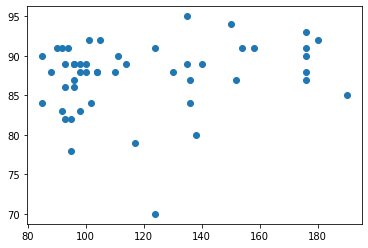

In [78]:
plt.scatter(data['Beats.Per.Minute'] , data['Popularity'])
plt.show()

In [79]:
corr_value = data[[ 'Danceability','Popularity' ]]
correlation = corr_value.corr(method='pearson')
correlation


,Danceability,Popularity
Danceability,1.000000,-0.071413
Popularity,-0.071413,1.000000


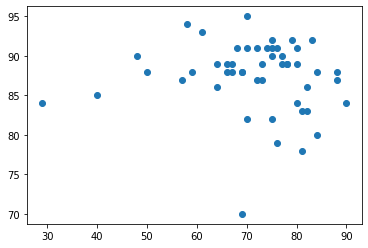

In [80]:
plt.scatter(data['Danceability'] , data['Popularity'])
plt.show()

In [81]:
corr_value = data[['Energy','Popularity' ]]
correlation = corr_value.corr(method='pearson')
correlation

,Energy,Popularity
Energy,1.000000,-0.080295
Popularity,-0.080295,1.000000


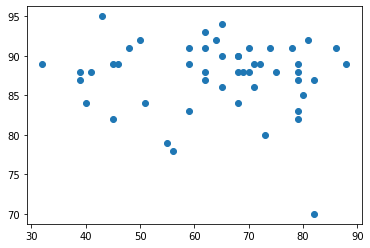

In [82]:
plt.scatter(data['Energy'] , data['Popularity'])
plt.show()

# What is distribution of popularity with respect to energy

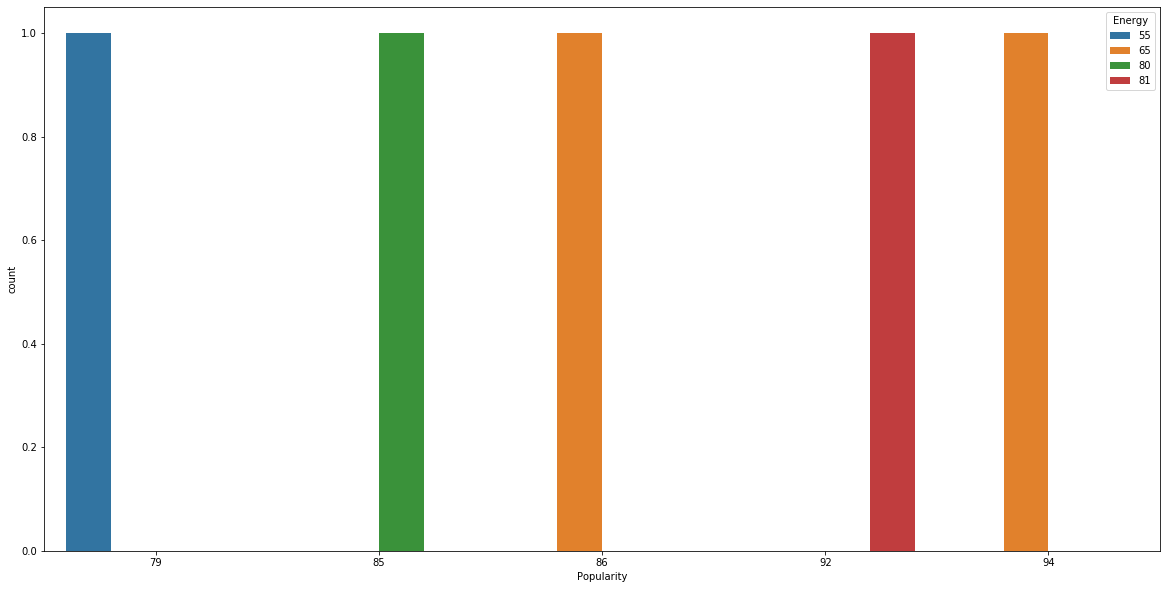

In [83]:
plt.figure(figsize = (20,10))
sns.countplot('Popularity',hue = 'Energy' ,data=data.head())
plt.show()
#data.plot( x = 'Popularity', y= 'Energy', kind='hist')

# What is distribution of popularity with respect to beats. Per minute

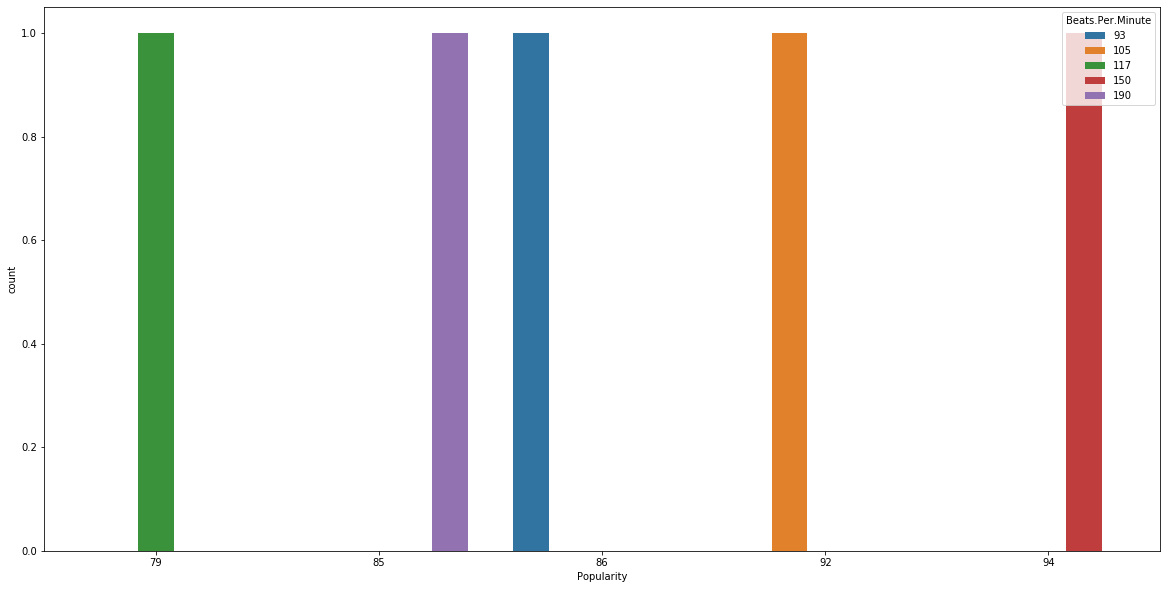

In [84]:
plt.figure(figsize = (20,10))
sns.countplot('Popularity',hue = 'Beats.Per.Minute' ,data=data.head())
plt.show()
#data.plot( x = 'Popularity', y= 'Beats.Per.Minute', kind='hist')

# Are there any outliers in popularity, danceability, beats per minute?

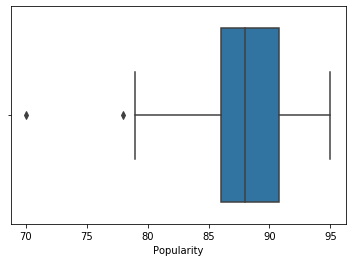

In [85]:
sns.boxplot(data['Popularity'])

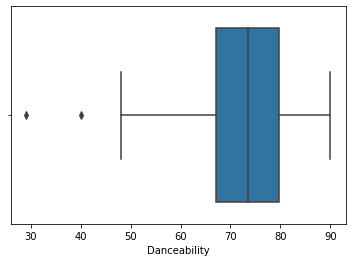

In [86]:
sns.boxplot(data['Danceability'])

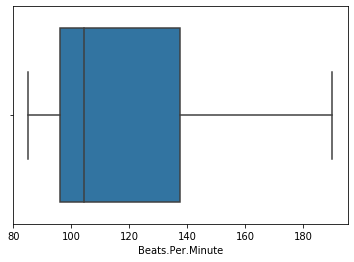

In [87]:
sns.boxplot(data['Beats.Per.Minute'])

# Visual each artist distribution

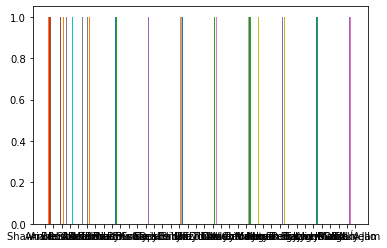

In [93]:
plt.hist(data['Artist.Name'])
plt.show()

In [96]:
data[['Artist.Name']].head()

,Artist.Name
1,Shawn Mendes
2,Anuel AA
3,Ariana Grande
4,Ed Sheeran
5,Post Malone


In [99]:
data.loc[1:3 , 'Artist.Name']

1     Shawn Mendes
2         Anuel AA
3    Ariana Grande
Name: Artist.Name, dtype: object

In [102]:
f1 = data.loc[:,['Artist.Name','Popularity']]
f1.head()

,Artist.Name,Popularity
1,Shawn Mendes,79
2,Anuel AA,92
3,Ariana Grande,85
4,Ed Sheeran,86
5,Post Malone,94


# Visual each track name distribution

In [103]:
f1 = data.loc[:,['Track.Name','Popularity']]
f1.head()

,Track.Name,Popularity
1,Señorita,79
2,China,92
3,boyfriend (with Social House),85
4,Beautiful People (feat. Khalid),86
5,Goodbyes (Feat. Young Thug),94


# Visual each genre distribution

In [104]:
f1 = data.loc[:,['Genre','Popularity']]
f1.head()

,Genre,Popularity
1,canadian pop,79
2,reggaeton flow,92
3,dance pop,85
4,pop,86
5,dfw rap,94
